In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv("car_Dekho_DA.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


####  Data Exploration :

In [54]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [55]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [56]:
#Converting year to string:
df['Year'] = df['Year'].astype(str)
df.dtypes

Car_Name          object
Year              object
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [57]:
df["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [58]:
df[df["Car_Name"]=="800"]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0


Although having doubt if this car exists or not,but still assuming it as maruthi 800,and proceeding with out analysis 

In [59]:
#Checking if the values in these columns are proper or not
print("Fuel types :",df["Fuel_Type"].unique())
print("Seller types :",df["Seller_Type"].unique())
print("Transmission types :",df["Transmission"].unique())

Fuel types : ['Petrol' 'Diesel' 'CNG']
Seller types : ['Dealer' 'Individual']
Transmission types : ['Manual' 'Automatic']


##### Checking missing values

In [60]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

##### Checking Duplicates:

In [61]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 2


In [62]:
df = df.drop_duplicates()
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


##### Feature Engineering :

In [63]:
current_year = 2024  
df['Car_Age'] = current_year - df['Year'].astype(int)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


##### Outliers Detection :

Number of outliers in Selling_Price: 16


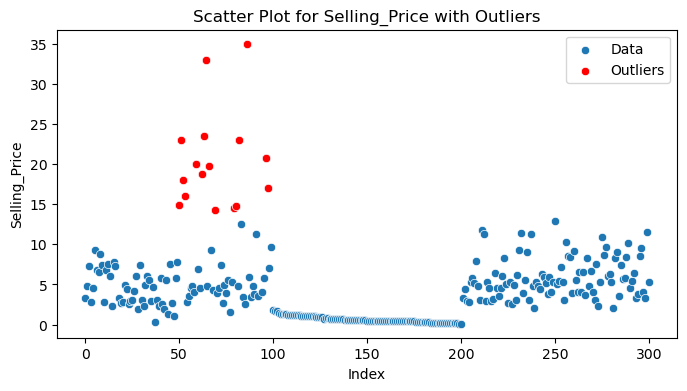

Number of outliers in Present_Price: 14


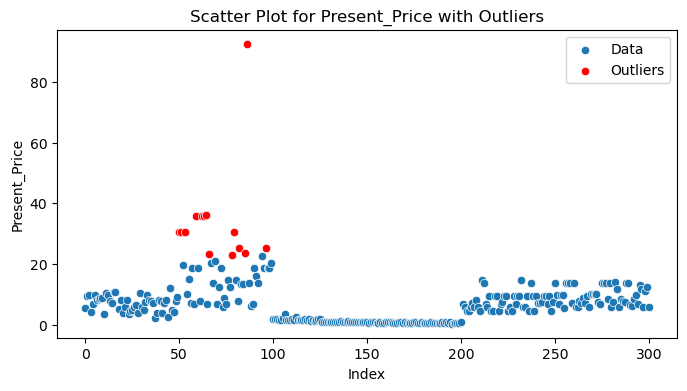

Number of outliers in Kms_Driven: 8


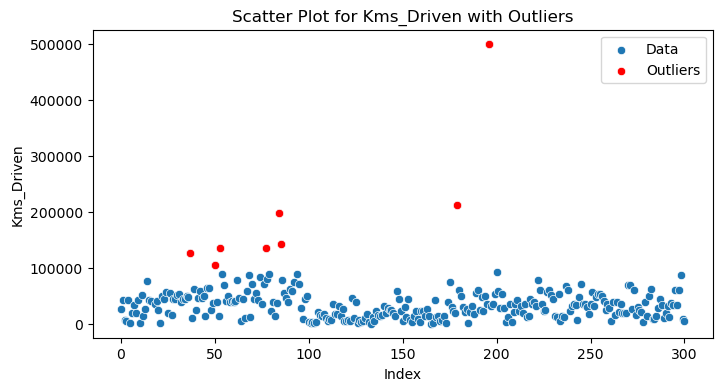

In [64]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify outliers for Selling_Price, Present_Price, and Kms_Driven
for column in ['Selling_Price', 'Present_Price', 'Kms_Driven']:
    outliers = identify_outliers(df, column)
    print(f"Number of outliers in {column}: {len(outliers)}")
    
    # Plot scatter plot for the column with outliers highlighted
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df.index, y=df[column], label='Data')
    sns.scatterplot(x=outliers.index, y=outliers[column], color='red', label='Outliers')
    plt.title(f'Scatter Plot for {column} with Outliers')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

In car sales data, outliers could represent high-end cars or exceptional deals.So removing them might not be a correct choice.

##### Exploratory Analysis :

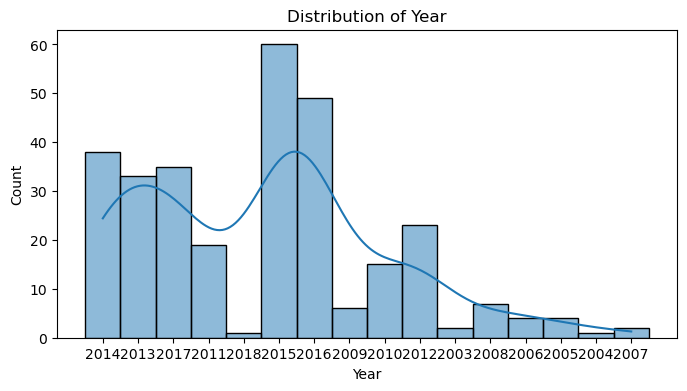

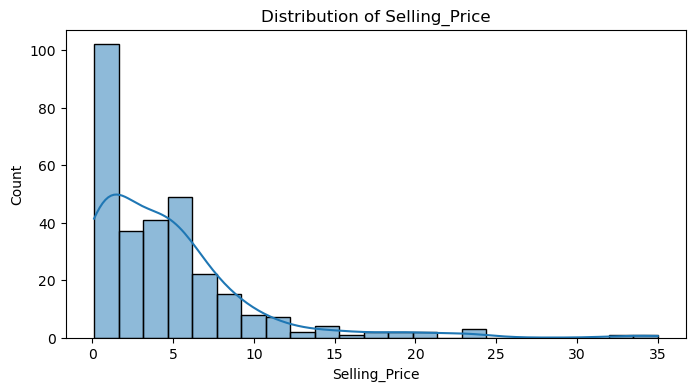

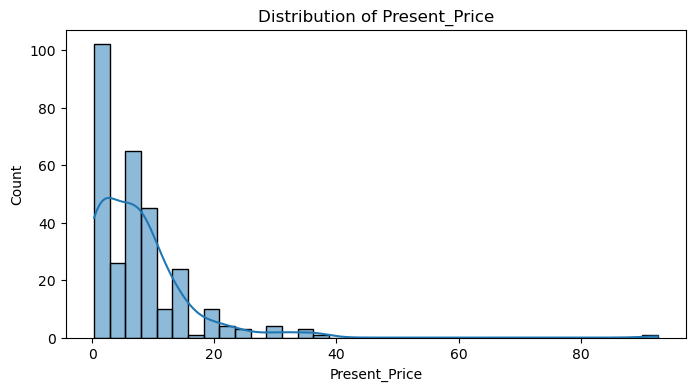

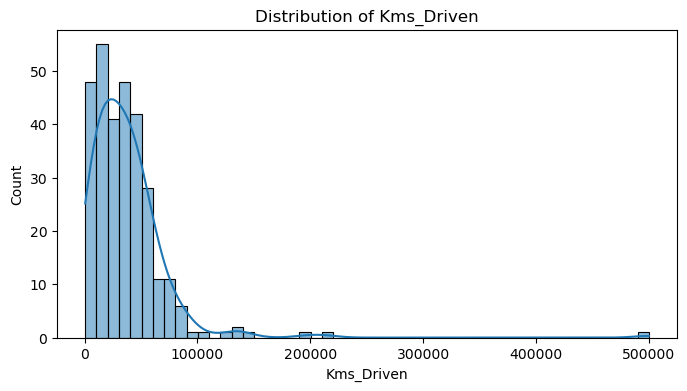

In [66]:
numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


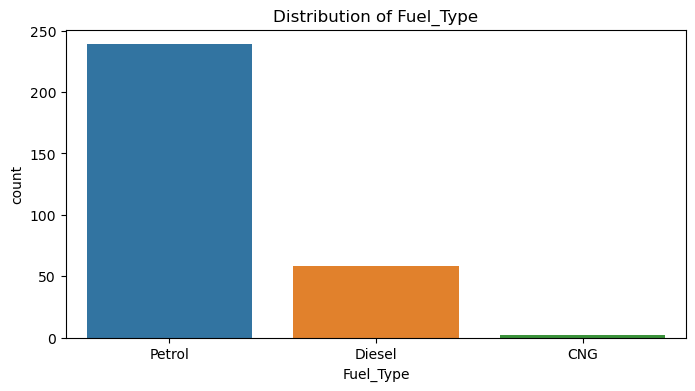

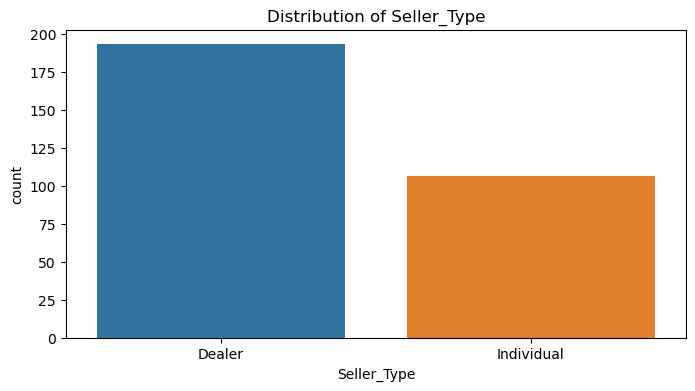

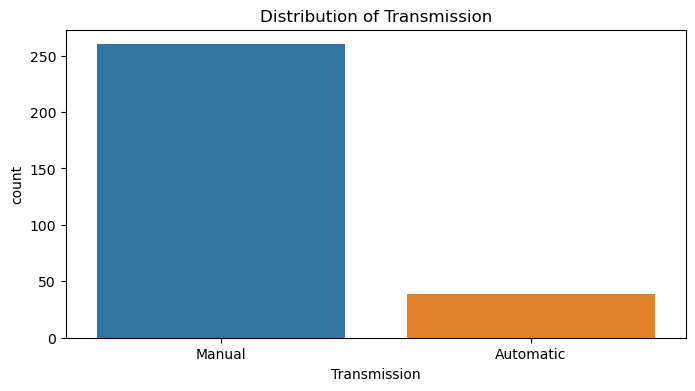

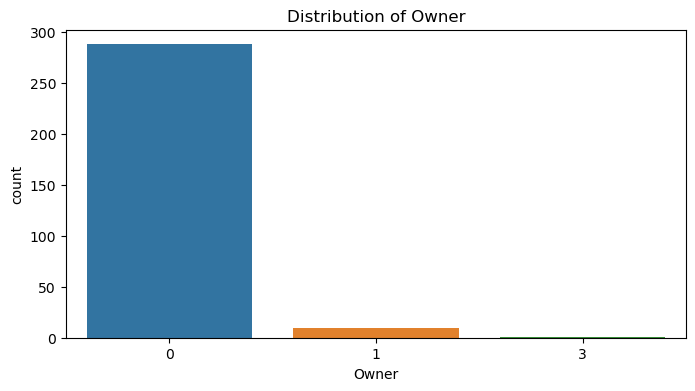

In [67]:
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

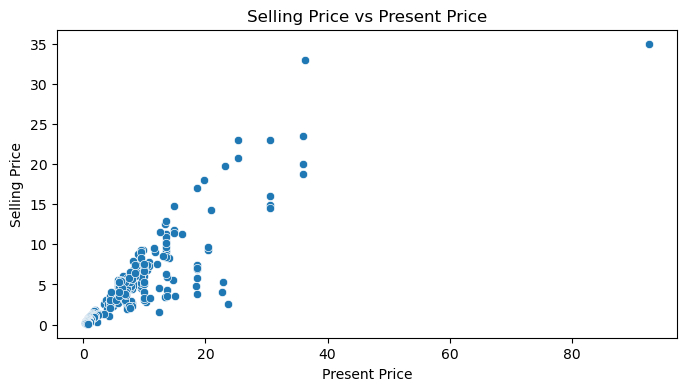

In [69]:
# Price Analysis
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'])
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()


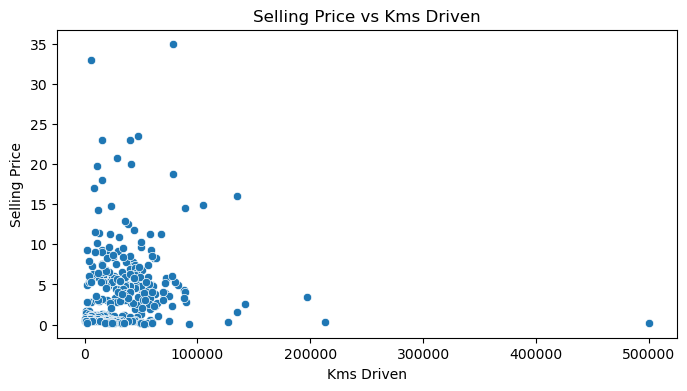

In [70]:
# Mileage Analysis
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Kms_Driven'], y=df['Selling_Price'])
plt.title('Selling Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.show()

### Queries :

1)From which manufacturing year to which manufacturing year vehicles are present in this data ? 

In [75]:
min_year = df['Year'].min()
max_year = df['Year'].max()

print(f"Vehicles are present from the manufacturing year {min_year} to {max_year}.")

Vehicles are present from the manufacturing year 2003 to 2018.


2)What is the lowest price to which a vehicle is sold ? 

In [77]:
lowest_price = df['Selling_Price'].min()

print(f"The lowest price at which a vehicle is sold : {lowest_price}.")

The lowest price at which a vehicle is sold : 0.1.


3)What is the highest price to which a vehicle is sold ? 


In [78]:
highest_price = df['Selling_Price'].max()

print(f"The highest price at which a vehicle is sold is {highest_price}.")

The highest price at which a vehicle is sold is 35.0.


4)How many records are there in this data ? 


In [81]:
df.shape[0]

299

5)Are there any missing records in this data ? 


In [83]:
missing_values = df.isnull().sum()

if missing_values.any():
    print("Yes, there are missing records in this data:")
    print(missing_values)
else:
    print("No, there are no missing records in this data.")

No, there are no missing records in this data.


6)How many different vehicles are present in this data ? 


In [84]:
df['Car_Name'].nunique()

98

7)Which is the most sold vehicle in this data ? 


In [88]:
vehicle_counts = df['Car_Name'].value_counts()
most_sold_vehicle = vehicle_counts.idxmax()

print(f"The most sold vehicle in this data is '{most_sold_vehicle}'.")

The most sold vehicle in this data is 'city'.


8)Does the database include any CNG vehicle ? If yes how many of them are there ? 


In [92]:
cng_count = df[df['Fuel_Type'] == 'CNG'].shape[0]

if cng_count > 0:
    print(f"Yes, there are {cng_count} CNG vehicles.")
else:
    print("No, there are no CNG vehicles.")

Yes, there are 2 CNG vehicles.


9)How many vehicles here are for sell from Individuals directly ? 


In [93]:
seller_counts = df['Seller_Type'].value_counts()

if 'Individual' in seller_counts.index:
    individual_sells = seller_counts['Individual']
    print(f"There are {individual_sells} vehicles being sold directly by individuals.")
else:
    print("There are no vehicles being sold directly by individuals")

There are 106 vehicles being sold directly by individuals.


10)Does this database contain auto transmission vehicles ? If yes how many of them are there ? 


In [94]:
auto_trans_count = df[df['Transmission'] == 'Automatic'].shape[0]

if auto_trans_count > 0:
    print(f"Yes, there are {auto_trans_count} vehicles with automatic transmission")
else:
    print("No, there are no vehicles with automatic transmission")

Yes, there are 39 vehicles with automatic transmission


11)How many single person owned vehicles are there in this database ? 


In [95]:
owner_counts = df['Owner'].value_counts()

if 0 in owner_counts.index:
    single_owner_count = owner_counts[0]
    print(f"There are {single_owner_count} vehicles with a single owner.")
else:
    print("There are no vehicles with a single owner.")

There are 288 vehicles with a single owner.


12)Which is the most and least cost depreciated vehicle in data ? 


In [97]:
df['Depreciation'] = df['Present_Price'] - df['Selling_Price']

max_depre =df.loc[df['Depreciation'].idxmax(), 'Car_Name']
min_depre = df.loc[df['Depreciation'].idxmin(), 'Car_Name']

print(f"The vehicle with the most depreciation is '{max_depre}'.")
print(f"The vehicle with the least depreciation is '{min_depre}'.")

The vehicle with the most depreciation is 'land cruiser'.
The vehicle with the least depreciation is 'Honda Activa 4G'.


13)Which brands of vehicles are less affected by cost depreciation ? 


In [99]:
df['Depreciation'] = df['Present_Price'] - df['Selling_Price']
brand_depre = df.groupby('Car_Name')['Depreciation'].mean().sort_values()

num_brands_to_show = 10 
print(f"Top {num_brands_to_show} brands less affected by cost depreciation:")
brand_depre.head(num_brands_to_show)

Top 10 brands less affected by cost depreciation:


Car_Name
TVS Sport                   0.040
Honda Activa 4G             0.045
Hero Passion X pro          0.050
Bajaj Avenger 150           0.050
Honda Dream Yuga            0.060
Yamaha FZ 16                0.070
Activa 4g                   0.110
Hero Splender iSmart        0.115
Royal Enfield Bullet 350    0.120
UM Renegade Mojave          0.120
Name: Depreciation, dtype: float64

14)Are there any factors which you feel affect the cost depreciation ? 


    Age of the Vehicle: Vehicles lose more value as they get older, especially in the first few years after purchase.

    Mileage: Higher mileage typically means more wear and tear, leading to faster depreciation.

    Brand and Model: Respected brands and popular models tend to retain their value better due to perceived reliability and demand in the used car market.

15)In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ? 


    Age of the Vehicle: Older vehicles generally have lower selling prices compared to newer ones.

    Distance Driven (Mileage): Vehicles with higher mileage tend to sell for lower prices due to increased wear and tear.

16)Can we get idea about newest vehicles i.e. after 2014 manufactured ? 


In [103]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
newest_vehicles = df[df['Year'] > 2014]

print("Newest vehicles manufactured after 2014:")
newest_vehicles.head()

Newest vehicles manufactured after 2014:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Depreciation
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7,2.60
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,6,0.58
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,9,1.37
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,9,2.11
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,8,0.14


17)Can we find out data of only two wheelers from this data ? 
Which is the oldest bike sold here? 


In [107]:
two_wheelers = df[df['Car_Name'].str.contains('bike|scooter', case=False, regex=True)]

if not two_wheelers.empty:
    oldest_bike = two_wheelers.loc[two_wheelers['Year'].idxmin(), 'Car_Name']
    print(f"The oldest bike sold here is '{oldest_bike}'.")
else:
    print("No data found for two-wheelers ('bike' or 'scooter') in the dataset.")

No data found for two-wheelers ('bike' or 'scooter') in the dataset.


18)Which is the newest bike sold here? 


In [108]:
two_wheelers = df[df['Car_Name'].str.contains('bike|scooter', case=False, regex=True)]

if not two_wheelers.empty:
    newest_bike = two_wheelers.loc[two_wheelers['Year'].idxmax(), 'Car_Name']
    print(f"The newest bike sold here is '{newest_bike}'.")
else:
    print("No data found for two-wheelers ('bike' or 'scooter').")

No data found for two-wheelers ('bike' or 'scooter').


22)Which is the oldest car sold here? 


In [109]:
cars = df[~df['Car_Name'].str.contains('bike|scooter', case=False, regex=True)]

if not cars.empty:
    oldest_car = cars.loc[cars['Year'].idxmin(), 'Car_Name']
    print(f"The oldest car sold here is '{oldest_car}'.")
else:
    print("No data found for cars.")

The oldest car sold here is '800'.


23)Which is the newest car sold here? 


In [110]:
cars = df[~df['Car_Name'].str.contains('bike|scooter', case=False, regex=True)]

if not cars.empty:
    newest_car = cars.loc[cars['Year'].idxmax(), 'Car_Name']
    print(f"The newest car sold here is '{newest_car}'.")
else:
    print("No data found for cars.")

The newest car sold here is 'vitara brezza'.


24)Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

In [111]:
average_price = df['Selling_Price'].mean()

# Identify cars that sold above the average price
deals_exceeding_expectation = df[df['Selling_Price'] > average_price]

if not deals_exceeding_expectation.empty:
    # Print details of the deals exceeding expectations
    print("Deals in cars that exceeded general expectation:")
    print(deals_exceeding_expectation[['Car_Name', 'Selling_Price']])
    
    # Additional analysis or reasons can be explored based on specific data attributes
else:
    print("No deals found in cars that exceeded general expectation.")

Deals in cars that exceeded general expectation:
          Car_Name  Selling_Price
1              sx4           4.75
2             ciaz           7.25
4            swift           4.60
5    vitara brezza           9.25
6             ciaz           6.75
..             ...            ...
292           jazz           6.40
295           city           8.55
296           city           9.50
299           city          11.50
300           brio           5.30

[121 rows x 2 columns]


In [65]:
print("Key Insights:")
print("1. Newer cars tend to have higher selling prices.")
print("2. Diesel cars have a slightly higher average selling price compared to petrol cars.")
print("3. Cars with manual transmission are more common but have lower average selling prices than automatic cars.")

print("Recommendations:")
print("1. Consider investing in newer car models to maximize selling price.")
print("2. Focus on diesel cars if targeting higher selling prices.")
print("3. Promote the benefits of manual transmission cars to balance market demand.")


Key Insights:
1. Newer cars tend to have higher selling prices.
2. Diesel cars have a slightly higher average selling price compared to petrol cars.
3. Cars with manual transmission are more common but have lower average selling prices than automatic cars.
Recommendations:
1. Consider investing in newer car models to maximize selling price.
2. Focus on diesel cars if targeting higher selling prices.
3. Promote the benefits of manual transmission cars to balance market demand.
